# k-Means Clustering
This tutorial demonstrates the operations of the k-Means clustering algorithm for unsupervised learning
- Organizing data points into clusters is also referred to as stratifying and grouping
- k-Means finds simimlar types of data points and bunch them together
- k-Means is a clustering algorithm where *k* is the number of bins

Some known issues of k-means:
- Choosing k is more of an art than a science, although there are bounds: $1\leq k\leq n$, where n is the number of data points.
- Convergence issues: there may be no solution or no unique solution.
- Interpretability can be a problem (the biggest problem)
- Running k-Means on uniform data will still produce clusters
- It is sensitive to scale due to the use of Eculidean distance for measuring how far a data point is from a centroid
- Even on perfect data sets, if can get stuck in a local minimum

[Link for code tutorial](https://mubaris.com/posts/kmeans-clustering/)

** Algorithm**

Given inputs $x_1,x_2,x_3,...,x_n$:
1. Pick *k* random points as cluster centers called centroids.
2. Assign each $x_i$ to nearest cluster by calculating its distance to each centroid.
3. Find new cluster center by taking the average of the assigned points.
4. Repeat step 2 and 3 until none of the cluster assignments changes significantly

The elbow method is used in cases where *k* is not known beforehand.

The [dataset](https://github.com/mubaris/friendly-fortnight/blob/master/xclara.csv) for the tutorial has 3000 entries with 3 known clusters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
# load the dataset
data = pd.read_csv('xclara.csv')

In [4]:
print(data.shape)

(3000, 2)


In [5]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


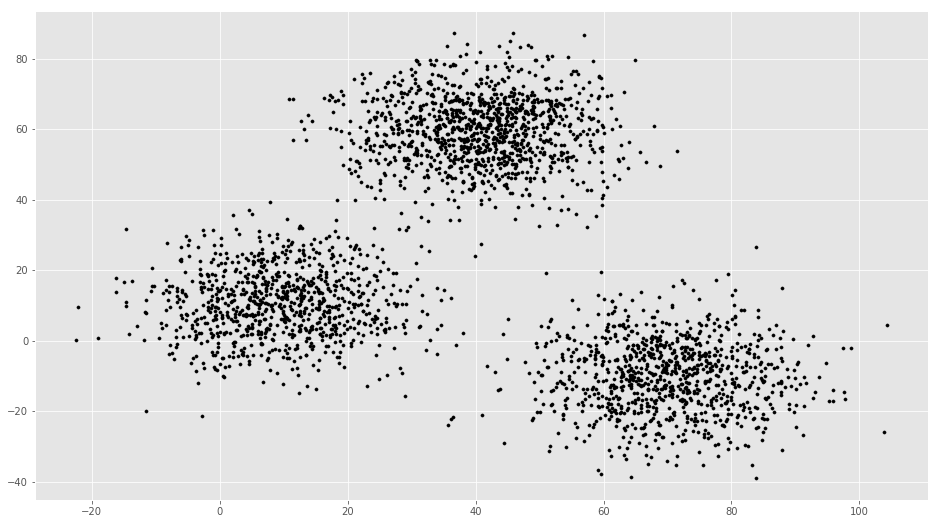

In [7]:
# Get the loaded values and visualize them
f1 = data['V1']
f2 = data['V2']
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=10)

In [8]:
# Euclidean distance calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [31]:
# Number of clusters
k = 3

In [32]:
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)),dtype=np.float32)

In [33]:
C

array([[75., 20.],
       [23., 48.],
       [41., 46.]], dtype=float32)

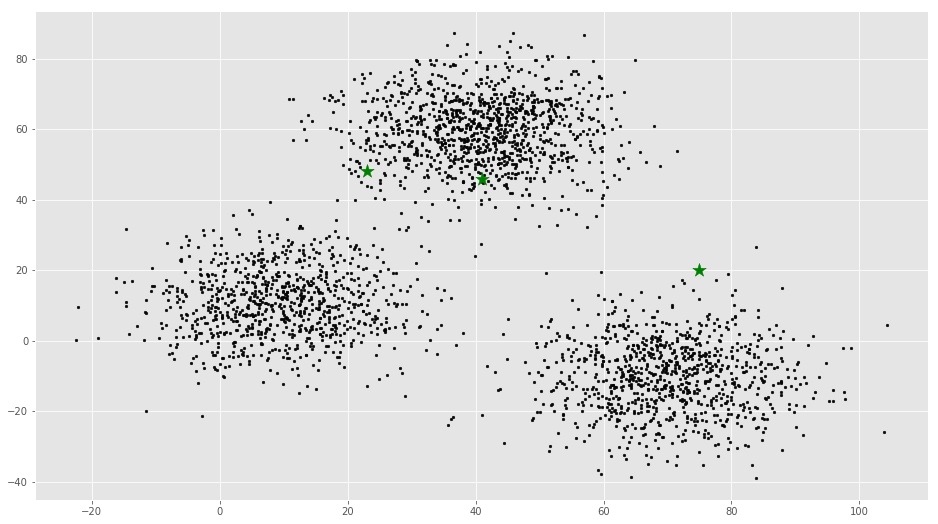

In [34]:
# plots the data along with the centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [35]:
X[0]

array([ 2.072345, -3.241693])

In [36]:
# store the old values of updated centroids
C_old = np.zeros(C.shape)

In [37]:
# Cluster labels (0, 1, 2)
clusters = np.zeros(len(X))

In [38]:
# Error function - distance between new and old centroids
error = dist(C, C_old, None)

# loop until the error between old and new centroids is zero
while error != 0:
    # Assigns each value to the closest centroid/cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # stores the centroid values before update
    C_old = deepcopy(C)
    
    # Finds the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [39]:
colors = ['r','g','b','y','c','m']

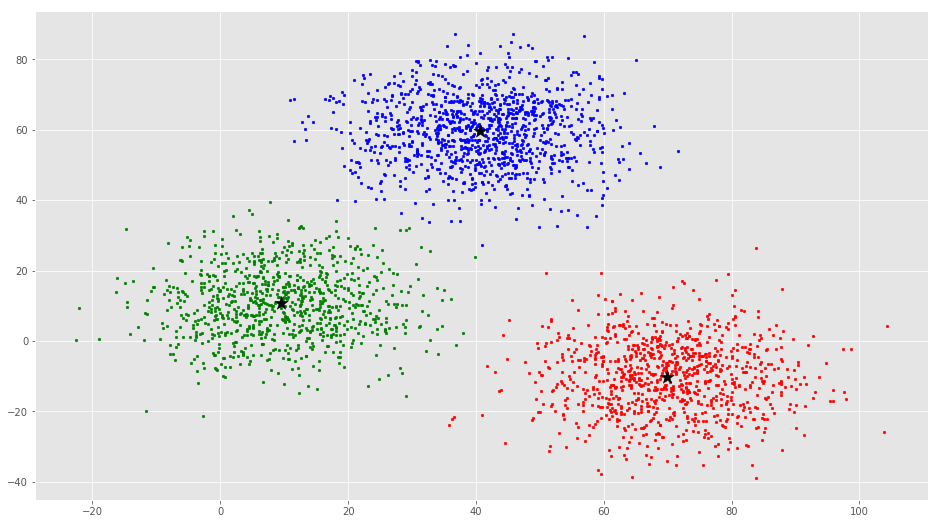

In [40]:
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:,0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:,0],C[:,1], marker='*', s=200, c='#050505')

## Implementing k-Means using scikit-learn

In [41]:
from sklearn.cluster import KMeans

In [42]:
# Number of clusters
kmeans = KMeans(n_clusters=3)

#FItting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

In [43]:
# Comparing with scikit-learn centroids
print("From scratch:",C)
print("From sklearn:",centroids)

From scratch: [[ 69.92419  -10.119641]
 [  9.478045  10.686052]
 [ 40.683628  59.715893]]
From sklearn: [[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


## Tutorial 2 with generated dataset

This section generates a dataset using `make_blobs()` function

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

In [45]:
# Creates a simple dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

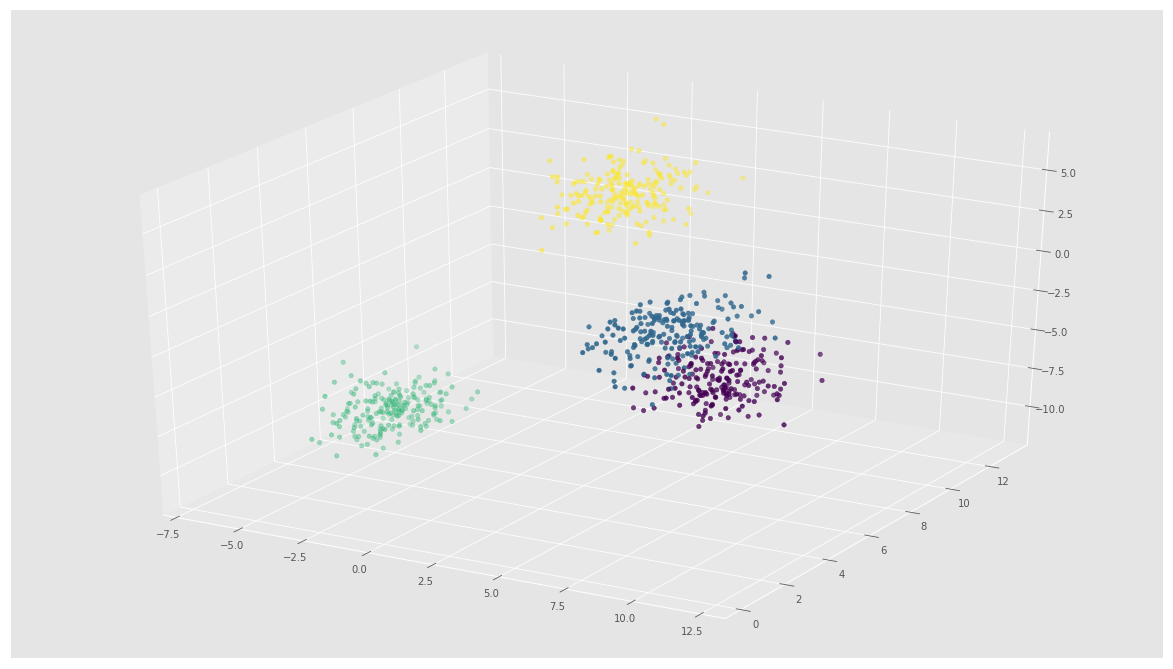

In [54]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=y)

In [47]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4)

In [48]:
# Fitting with inputs
kmeans = kmeans.fit(X)

In [49]:
# Predicting the clusters
labels = kmeans.predict(X)

In [50]:
# Getting the cluster centers
C = kmeans.cluster_centers_

In [51]:
C

array([[ 9.0171744 ,  4.2871951 , -2.71161575],
       [-4.20562724,  5.05362834, -8.79129161],
       [ 0.67387921, 10.02329352,  2.89128184],
       [ 8.19149126,  3.10510472,  0.72108742]])

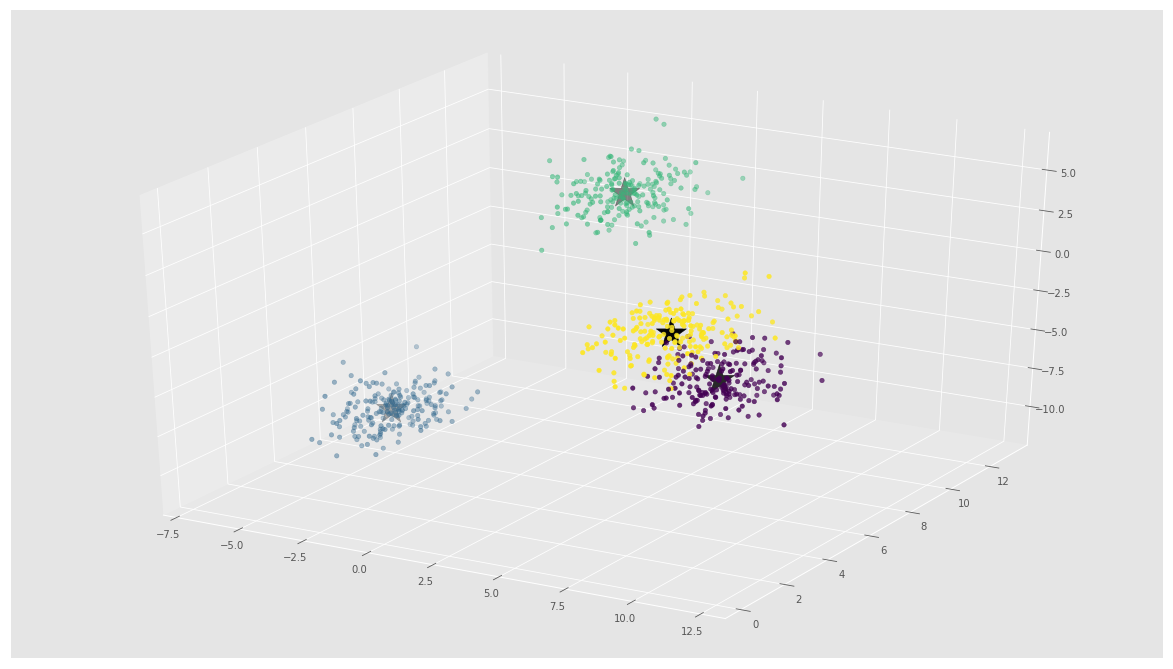

In [55]:
# Visualization
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1],X[:,2], c=labels)
ax.scatter(C[:,0],C[:,1],C[:,2], marker='*', s=1000, c='#050505')